In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('HRDataset_v14.csv')
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [4]:
df.describe().round(2) #estadistica de la tabla completa

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00,303.00,311.00,311.00,311.00,311.00,311.00
mean,10156.00,0.40,0.81,0.43,2.39,4.61,2.98,0.09,69020.68,0.33,16.85,6555.48,14.57,4.11,3.89,1.22,0.41,10.24
std,89.92,0.49,0.94,0.50,1.79,1.08,0.59,0.29,25156.64,0.47,6.22,16908.40,8.08,0.79,0.91,2.35,1.29,5.85
min,10001.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,45046.00,0.00,1.00,1013.00,1.00,1.12,1.00,0.00,0.00,1.00
25%,10078.50,0.00,0.00,0.00,1.00,5.00,3.00,0.00,55501.50,0.00,18.00,1901.50,10.00,3.69,3.00,0.00,0.00,5.00
50%,10156.00,0.00,1.00,0.00,1.00,5.00,3.00,0.00,62810.00,0.00,19.00,2132.00,15.00,4.28,4.00,0.00,0.00,10.00
75%,10233.50,1.00,1.00,1.00,5.00,5.00,3.00,0.00,72036.00,1.00,20.00,2355.00,19.00,4.70,5.00,0.00,0.00,15.00
max,10311.00,1.00,4.00,1.00,5.00,6.00,4.00,1.00,250000.00,1.00,30.00,98052.00,39.00,5.00,5.00,8.00,6.00,20.00


In [6]:
df["Salary"].describe().round(2)

count       311.00
mean      69020.68
std       25156.64
min       45046.00
25%       55501.50
50%       62810.00
75%       72036.00
max      250000.00
Name: Salary, dtype: float64

Text(0, 0.5, 'Frecuencia absoluta')

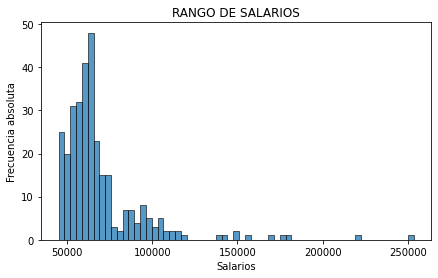

In [14]:
#Realizar histograma con los salarios. que rango de salarios son los mas populares?
#realizar grafico de violin con los salarios, discriminado por genero
#Graficar una seria de tiempo correspondiente a la fecha de contratacioon.
df.values.flatten()
intervalos= int((max(df['Salary'])-min(df['Salary']))/60)
fig, ax = plt.subplots(figsize=(7, 4))
ax=sns.histplot(data=df, x=df['Salary'],binwidth=intervalos) 
ax.set_title('RANGO DE SALARIOS')
ax.set_xlabel('Salarios')
ax.set_ylabel('Frecuencia absoluta')


In [20]:
df["Salary"].mode() #La moda de los salarios



0    57815
1    61242
2    63025
dtype: int64

In [22]:
df.groupby('Sex')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,176.0,67786.727273,25805.669834,45046.0,55397.5,62066.5,68238.25,250000.0
M,135.0,70629.400000,24285.293173,45115.0,55650.0,63353.0,75655.00,178000.0


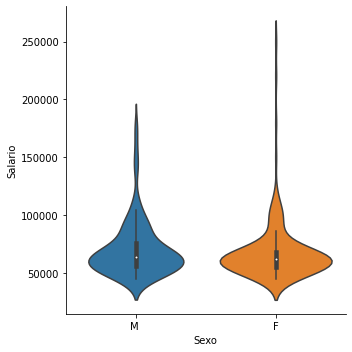

In [33]:
ax=sns.catplot(data=df[['Salary','Sex']],kind='violin',x='Sex',y='Salary',split=True)
ax.set(xlabel='Sexo',ylabel='Salario')

In [37]:
#Graficar una serie de tiempo correspondiente a la fecha de contratacioon.

df['DateStart']=pd.to_datetime(df['DateofHire']) #me aseguro de que sea de tipo fecha
df['DateStart']

0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateStart, Length: 311, dtype: datetime64[ns]

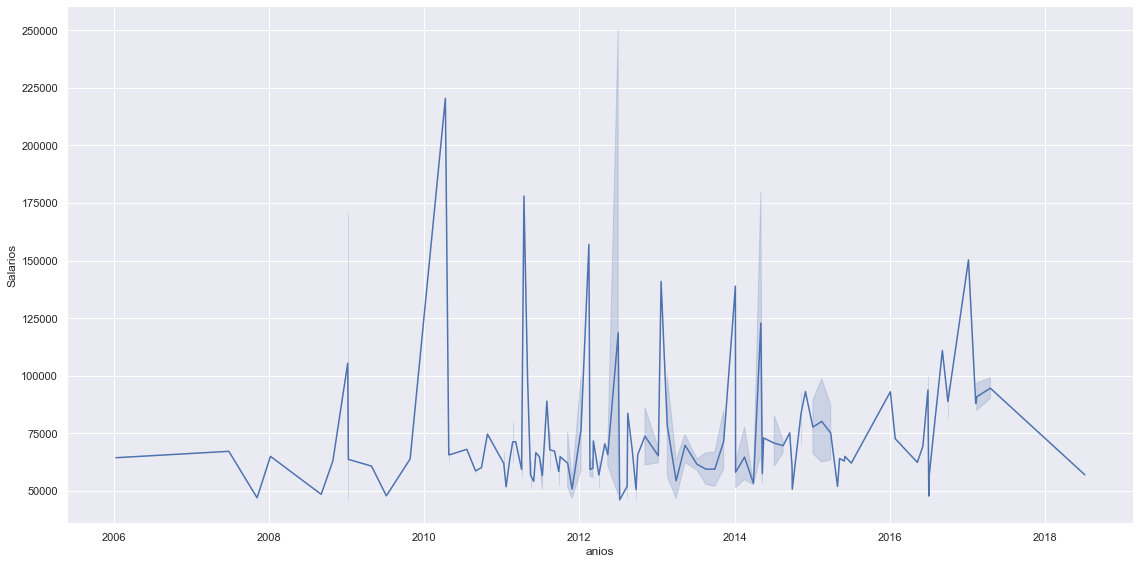

In [60]:
#sns.set(rc={'figure.figsize':(10,16)})
ax=sns.relplot(data=df,x=df['DateStart'],y=df['Salary'],kind='line',height=8,aspect=2)
ax.set(xlabel='anios',ylabel='Salarios')
